In [3]:
import numpy as np
import pandas as pd
import scipy as sp

In [37]:
np.random.seed(42)

In [38]:
# Correlation

x = np.random.randint(0,50,1000)
y = x + np.random.normal(0,10, 1000)
len(x), len(y)

(1000, 1000)

In [39]:
# Numpy implementation
np.corrcoef(x,y)

array([[1.        , 0.81014352],
       [0.81014352, 1.        ]])

In [47]:
# scipy implementation
from scipy.stats import pearsonr

pearsonr(x,y)
#pearsonr?

(0.8101435222157063, 1.0630495901642259e-233)

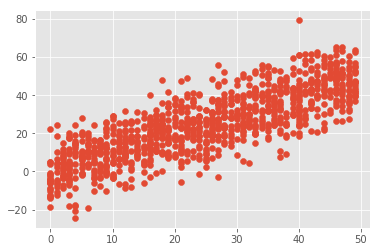

In [19]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

plt.scatter(x,y)
plt.show()


In [49]:
# Negative correlation

# 1000 random integers between 0 and 50
x = np.random.randint(0, 50, 1000)

# Negative Correlation with some noise
y = 100 - x + np.random.normal(0, 5, 1000)

np.corrcoef(x, y)

array([[ 1.        , -0.94635912],
       [-0.94635912,  1.        ]])

In [50]:
pearsonr(x,y)

(-0.9463591161481955, 0.0)

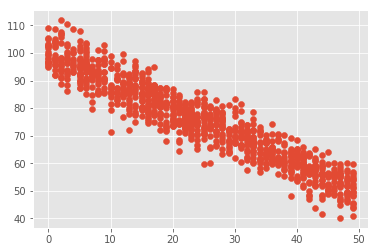

In [21]:
plt.scatter(x,y)
plt.show()

In [51]:
# No/Weak Correlation
x = np.random.randint(0, 50, 1000)
y = np.random.randint(0, 50, 1000)

np.corrcoef(x, y)

array([[1.       , 0.0226305],
       [0.0226305, 1.       ]])

In [52]:
pearsonr(x,y)

(0.02263049519533195, 0.47471064975878974)

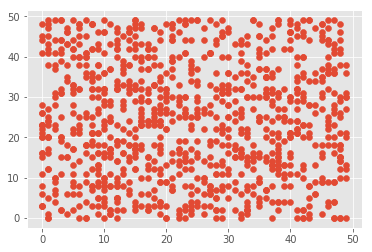

In [24]:
plt.scatter(x, y)
plt.show()

In [25]:
### Correlation Matrix

import pandas as pd

df = pd.DataFrame({'a': np.random.randint(0, 50, 1000)})
df['b'] = df['a'] + np.random.normal(0, 10, 1000) # positively correlated with 'a'
df['c'] = 100 - df['a'] + np.random.normal(0, 5, 1000) # negatively correlated with 'a'
df['d'] = np.random.randint(0, 50, 1000) # not correlated with 'a'

df.corr()

,a,b,c,d
a,1.000000,0.811074,-0.942698,0.007598
b,0.811074,1.000000,-0.767330,-0.033948
c,-0.942698,-0.767330,1.000000,0.000081
d,0.007598,-0.033948,0.000081,1.000000


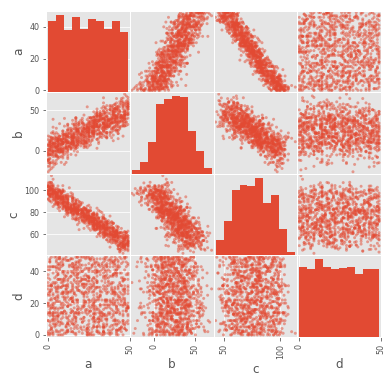

In [29]:
pd.plotting.scatter_matrix(df, figsize=(6, 6))
plt.show()

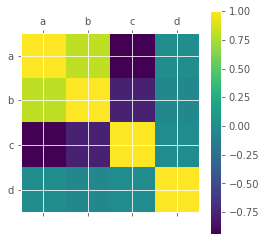

In [30]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

### Drop highly correlated features

In [4]:
# Create feature matrix with two highly correlated features
X = np.array([[1, 1, 1],
              [2, 2, 0],
              [3, 3, 1],
              [4, 4, 0],
              [5, 5, 1],
              [6, 6, 0],
              [7, 7, 1],
              [8, 7, 0],
              [9, 7, 1]])

# Convert feature matrix into DataFrame
df = pd.DataFrame(X)

# View the data frame
df

,0,1,2
0,1,1,1
1,2,2,0
2,3,3,1
3,4,4,0
4,5,5,1
5,6,6,0
6,7,7,1
7,8,7,0
8,9,7,1


In [5]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,0,1,2
0,NaN,0.976103,0.000000
1,NaN,NaN,0.034503
2,NaN,NaN,NaN


In [7]:
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

[1]

In [8]:
# Drop features 
df.drop(df[to_drop], axis=1)

,0,2
0,1,1
1,2,0
2,3,1
3,4,0
4,5,1
5,6,0
6,7,1
7,8,0
8,9,1
